# C1 Excercise: Clustering

Import standard libraries:

In [4]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import urllib.request
import zipfile

Download the dataset automatically (will be saved in the current directory):

In [5]:
# download
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip"
urllib.request.urlretrieve(url, "household_power_consumption.zip")

('household_power_consumption.zip', <http.client.HTTPMessage at 0x2a73b2cdac0>)

Unzip the dataset automatically:

In [6]:
with zipfile.ZipFile("./household_power_consumption.zip", 'r') as zip_ref:
    zip_ref.extractall(path=".")

We use the data provided by https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption. This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between
December 2006 and November 2010 (47 months).
Parts of this code are taken from https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html and adjusted by Fraunhofer IESE.

In [7]:
start_path = Path(
    r'.'
)
# Hinweis: falls Sie lokal arbeiten, geben Sie hier den lokalen ABSOLUTEN Pfad an, z.B. 
# r'C:\Users\schroth\PycharmProjects\data_literacy_vorlesung\Vorlesung 2022'

# I. Preprocessing

In [8]:
df_orig = pd.read_csv(
    start_path / 'household_power_consumption.txt', sep=';',decimal='.',na_values='?'
)
print('missing values (ratio):')
print(df_orig.isna().sum().sum()/(df_orig.shape[0]*df_orig.shape[1]))

missing values (ratio):
0.009736562467089115


## Aufgabe I.1

Was bedeutet *missing values (ratio):*? Wie kann man das beheben?

## Antwort I.1

to be filled

In [9]:
df = df_orig.copy()
df = df.fillna(0)

In [10]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Aufgabe I.2

Betrachten Sie die Ausgabe von df.head(). Was fällt Ihnne auf?

## Antwort I.2

To be filled.

In [11]:
timestamps = df.Date.str.cat(df.Time,sep='-')
# set the date as index (this may take a few seconds)
df = df.set_index( pd.to_datetime(timestamps, format='%d/%m/%Y-%H:%M:%S') )
# remove redudant columns
df.pop('Date')
df.pop('Time')
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Aufgabe I.3

Betrachten Sie die Zeitstempel von df.head() und df.tail(). Warum sind die Einträge für eine Analyse ungeeignet?

In [12]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


## Antwort I.3

To be filled

In [13]:
df=df[df.index>'2006/12/17']
df=df[df.index<='2010/11/26']
print(len(df)/(24*60)) # should be 1440.0

1440.0


## Aufgabe I.4

Was bedeuten die Spalten *['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']*? Machen Sie ggf. eine Internetrecherche.

<IPython.core.display.Javascript object>


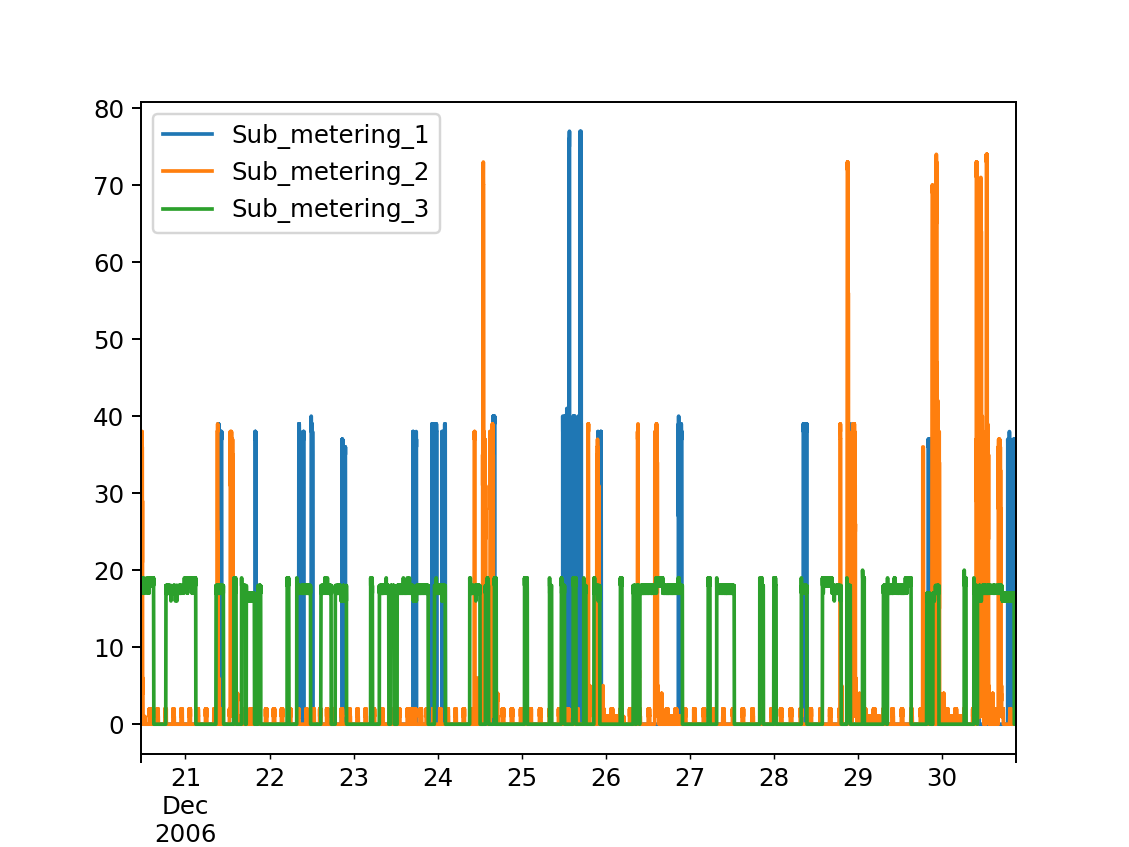

In [14]:
df.iloc[5000:20000][['Sub_metering_1', 'Sub_metering_2','Sub_metering_3']].plot();

## Antwort I.4

To be filled

# II. k-means Clustering

In [15]:
X_train = df.Sub_metering_1.values
X_train = X_train.reshape(1440,int(len(X_train)/1440), order='F').T
np.random.seed(42)
np.random.shuffle(X_train)

## Aufgabe II.5

Warum haben wir hier kein X_test/y_test?

## Antwort II.5

To be filled.

In [16]:
# parameters to be adjusted by user
n_time_series = 120
n = 5 # number of clusters

The clustering calculations: 

In [17]:
X_train2 = TimeSeriesScalerMeanVariance().fit_transform(X_train[:n_time_series])
km = TimeSeriesKMeans(n_clusters=n, verbose=True, random_state=42)
y_pred = km.fit_predict(X_train2)

2051.706 --> 979.506 --> 968.171 --> 965.743 --> 965.743 --> 


Plot the results:

<IPython.core.display.Javascript object>


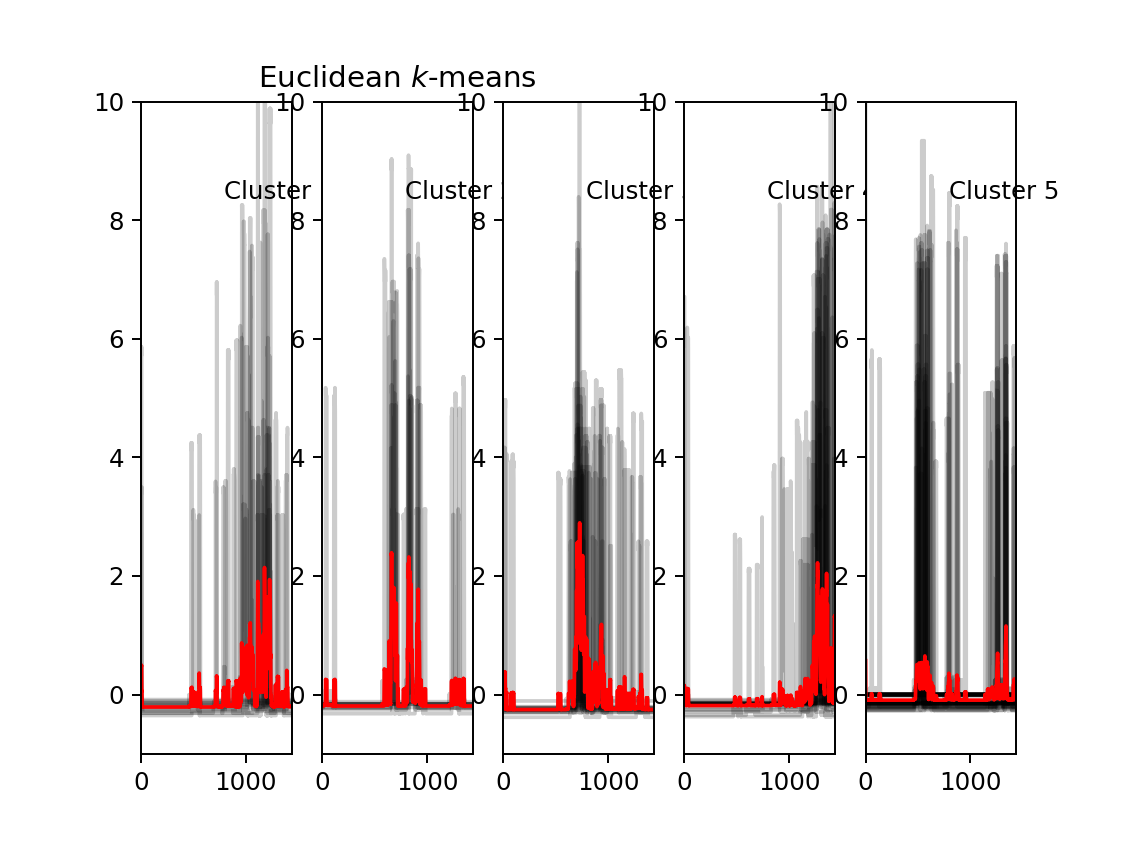

In [18]:
plt.figure()
for yi in range(n):
    plt.subplot(1, n, yi+1)
    for xx in X_train2[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train2.shape[1])
    plt.ylim(-1, 10)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [19]:
for yi in range(n):
    print('number of instances in cluster ', yi,':')
    print((km.labels_==yi).sum())

number of instances in cluster  0 :
14
number of instances in cluster  1 :
12
number of instances in cluster  2 :
15
number of instances in cluster  3 :
22
number of instances in cluster  4 :
57


## Aufgabe II.6

Versuchen Sie für *n* verschiedene Werte (z.B. *n=3,n=4*, usw.) und *n_time_series* (z.B. *n_time_series=180*).

Was beobachten Sie?

# III. DTW k-means Clustering

Dynamic Time Warping ist eine weitere Möglichkeit, Abstände zwischen Zeitreihen zu berechnen. Ein Youtube Tutorial: https://youtu.be/ERKDHZyZDwA (Dynamic time warping Herman Kamper).

**Hinweis:** die folgende Berechnung kann einige Minuten in Anspruch nehmen.

In [20]:
dtw_km = TimeSeriesKMeans(n_clusters=n,
                          metric="dtw",
                          verbose=True,
                          random_state=42)
y_pred_dtw = dtw_km.fit_predict(X_train2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    7.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    7.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    9.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   14.2s finished


112.552 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   15.4s finished


86.123 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   15.4s finished


85.929 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   15.9s finished


85.929 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   16.1s finished


<IPython.core.display.Javascript object>


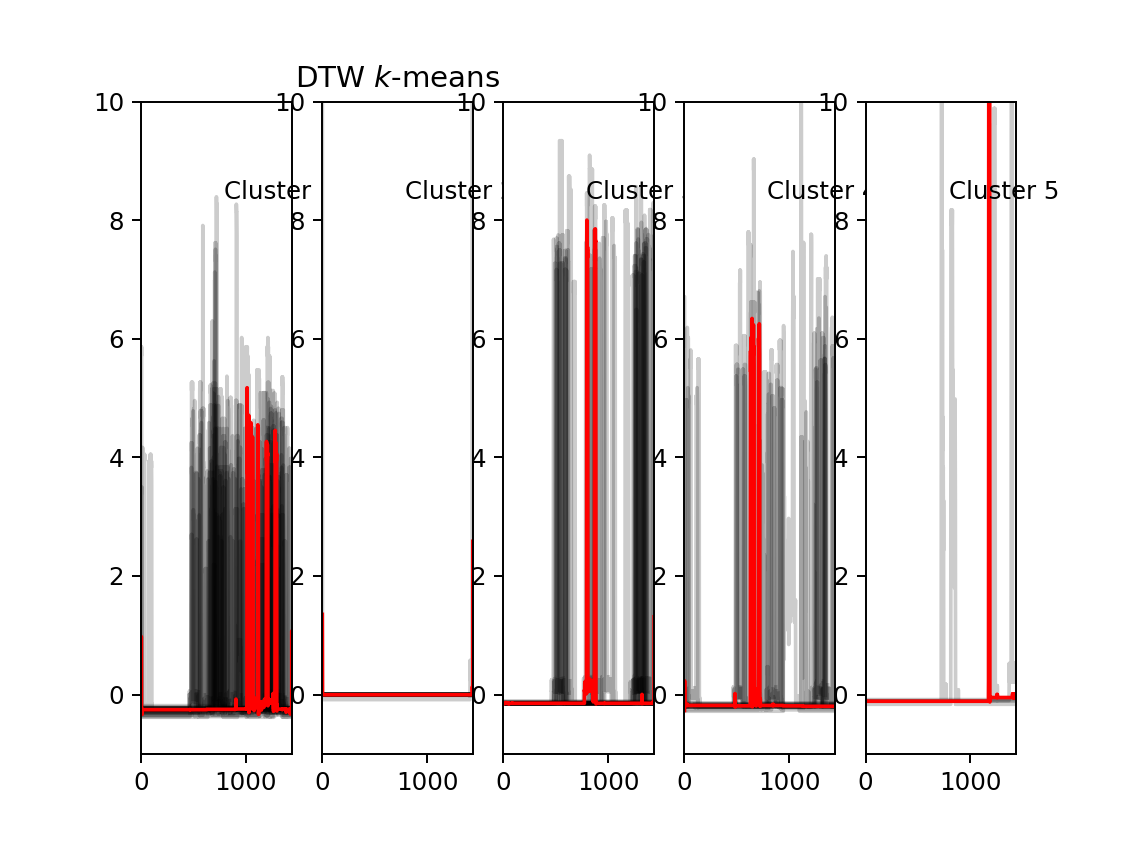

In [21]:
plt.figure()
for yi in range(n):
    plt.subplot(1, n, yi+1)
    for xx in X_train2[y_pred_dtw == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, X_train.shape[1])
    plt.ylim(-1, 10)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DTW $k$-means")

In [22]:
for yi in range(n):
    print('number of instances in cluster ', yi,':')
    print((dtw_km.labels_==yi).sum())

number of instances in cluster  0 :
33
number of instances in cluster  1 :
28
number of instances in cluster  2 :
35
number of instances in cluster  3 :
19
number of instances in cluster  4 :
5


**Bemerkung**: DTW ist relativ rechenintensiv, dies kann man abkuerzen, indem man die Zeitreihen verkuerzt. Zum Beispiel koennte man die Daten so zusammenfassen, dass man nicht fuer jede Minute 1 Zeitstempel hat, sondern z.B. alle 5 Minuten 1 Zeitstempel. Die tslearn Bibliothek benutzt dafuer den Befehl TimeSeriesResampler().